#### **MBD 2023-2024**
# **Fundamentals of Deep Learning**

## **Final project**


In [1]:
pip install tensorflow

In [2]:
pip install innvestigate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
  Attempting uninstall: ten

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import innvestigate
import pandas as pd
import numpy as np
from PIL import Image
from glob import iglob
import matplotlib.pyplot as plt
import sys

In [ ]:
#CHECK GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

In [5]:
!wget https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true -O data.rar

--2024-04-05 19:14:10--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2024-04-05 19:14:11--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2024-04-05 19:14:11--  https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar
Resolvin

In [6]:
!unrar x -o+ -y -inul data.rar

In [7]:
#getting the images from the base
basepath = 'Accident Images Analysis Dataset/'

def prepare_images(path, num_classes,  load_img_kwargs={}, ext='.jpg'):
  X, y = [], []
  for class_ in range(num_classes):
    for img_path in iglob(path + str(class_ + 1) + '/' + '*' + ext):
      img = image.load_img(img_path, **load_img_kwargs)
      x = image.img_to_array(img)
      X.append(x)
      y.append(class_)
  return np.array(X), np.array(y)

In [8]:
X, y = prepare_images(basepath + 'Accident-Severity/', 3,  load_img_kwargs={'target_size': (224, 224)})

len(X), len(y), np.unique(y)

(2946, 2946, array([0, 1, 2]))

**Exercise 1A. Data preprocessing**

In [9]:
#Reference: https://cloudxlab.com/assessment/displayslide/2533/numpy-arrays-example-reshaping-a-complex-array


In [10]:
print(X.shape)


(2946, 224, 224, 3)


In [11]:
# Splitting the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.shape

(2062, 224, 224, 3)

In [12]:
num_classes= 3

y_train= to_categorical(y_train, num_classes)
y_test= to_categorical(y_test, num_classes)
print(y_train)
print(y_test)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


**Multi Layer Perceptron Networks**

In [ ]:
 # Converting the image to grayscale
image_grayscale_train = X_train.mean(axis=3).astype('float32')
image_grayscale_test = X_test.mean(axis=3).astype('float32')
image_grayscale_train.shape
image_grayscale_test.shape

(884, 224, 224)

In [ ]:
# Scaling the grayscale images
image_grayscale_train/=255
image_grayscale_test/=255
print(image_grayscale_train)
print(image_grayscale_test)

[[[0.74379086 0.74379086 0.74379086 ... 0.7490196  0.7490196  0.7490196 ]
  [0.74379086 0.74379086 0.74379086 ... 0.7490196  0.7490196  0.7490196 ]
  [0.74379086 0.74379086 0.74379086 ... 0.7490196  0.7490196  0.7490196 ]
  ...
  [0.53594774 0.53594774 0.53594774 ... 0.16078432 0.16078432 0.16078432]
  [0.53594774 0.53594774 0.53594774 ... 0.16078432 0.16078432 0.16078432]
  [0.53594774 0.53594774 0.53594774 ... 0.16078432 0.16078432 0.16078432]]

 [[0.3529412  0.3529412  0.3529412  ... 0.9986928  0.9986928  0.9986928 ]
  [0.3529412  0.3529412  0.3529412  ... 0.9986928  0.9986928  0.9986928 ]
  [0.3529412  0.3529412  0.3529412  ... 0.9986928  0.9986928  0.9986928 ]
  ...
  [0.62875813 0.62875813 0.62875813 ... 0.5856209  0.5856209  0.5856209 ]
  [0.62875813 0.62875813 0.62875813 ... 0.5856209  0.5856209  0.5856209 ]
  [0.62875813 0.62875813 0.62875813 ... 0.5856209  0.5856209  0.5856209 ]]

 [[0.6509804  0.6509804  0.6509804  ... 0.6771242  0.6771242  0.6771242 ]
  [0.6509804  0.650980

In [ ]:
# Define MLP1 with two hidden layers of 64 neurons each and with activation function of relu for Dense layer and softmax function for output layer
mlp1 = Sequential([
    Flatten(input_shape=(224, 224)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define MLP2 with four hidden layers of 128 neurons each and with activation function of relu for Dense layer and softmax function for output layer
mlp2 = Sequential([
    Flatten(input_shape=(224, 224)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define MLP3 with two hidden layers of 256 neurons each and with activation function of relu for Dense layer and softmax function for output layer
mlp3 = Sequential([
    Flatten(input_shape=(224, 224)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

mlp1.summary()
mlp2.summary()
mlp3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 64)                3211328   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 3219843 (12.28 MB)
Trainable params: 3219843 (12.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequenti

In [ ]:
# Compile the models with categorical cross-entropy loss and adam optimizer

mlp1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size  = 32
epochs      = 10

mlp1_history = mlp1.fit(image_grayscale_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(image_grayscale_test, y_test))
mlp2_history = mlp2.fit(image_grayscale_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(image_grayscale_test, y_test))
mlp3_history = mlp3.fit(image_grayscale_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(image_grayscale_test, y_test))

Epoch 1/10
65/65 [==============================] - 4s 21ms/step - loss: 1.5539 - accuracy: 0.5126 - val_loss: 1.4293 - val_accuracy: 0.5577
Epoch 2/10
65/65 [==============================] - 1s 13ms/step - loss: 1.0095 - accuracy: 0.5713 - val_loss: 0.8576 - val_accuracy: 0.5577
Epoch 3/10
65/65 [==============================] - 1s 13ms/step - loss: 0.8809 - accuracy: 0.5708 - val_loss: 0.7586 - val_accuracy: 0.6165
Epoch 4/10
65/65 [==============================] - 1s 10ms/step - loss: 0.8326 - accuracy: 0.5951 - val_loss: 0.7614 - val_accuracy: 0.6097
Epoch 5/10
65/65 [==============================] - 1s 9ms/step - loss: 0.8164 - accuracy: 0.5883 - val_loss: 0.9248 - val_accuracy: 0.5045
Epoch 6/10
65/65 [==============================] - 1s 9ms/step - loss: 0.8674 - accuracy: 0.6023 - val_loss: 0.8085 - val_accuracy: 0.5679
Epoch 7/10
65/65 [==============================] - 1s 9ms/step - loss: 0.7638 - accuracy: 0.6266 - val_loss: 0.7646 - val_accuracy: 0.6256
Epoch 8/10
65/65

In [ ]:
# Train history
histories = [mlp1_history, mlp2_history, mlp3_history]

# Model names
model_names = ['MLP1', 'MLP2', 'MLP3']

# Create a dataframe for the train and validation history
results = pd.DataFrame(columns=['Model', 'Train Acc.', 'Test Acc.', 'Train Loss', 'Test Loss'])

# Populate the results dataframe
for i, model_name in enumerate(model_names):
    train_acc = histories[i].history['accuracy'][-1]
    test_acc = histories[i].history['val_accuracy'][-1]
    train_loss = histories[i].history['loss'][-1]
    test_loss = histories[i].history['val_loss'][-1]
    results.loc[i] = [model_name, train_acc, test_acc, train_loss, test_loss]

print(results)

  Model  Train Acc.  Test Acc.  Train Loss  Test Loss
0  MLP1    0.616392   0.630090    0.768041   0.759842
1  MLP2    0.598933   0.643665    0.784713   0.755824
2  MLP3    0.603298   0.607466    0.774615   0.802383


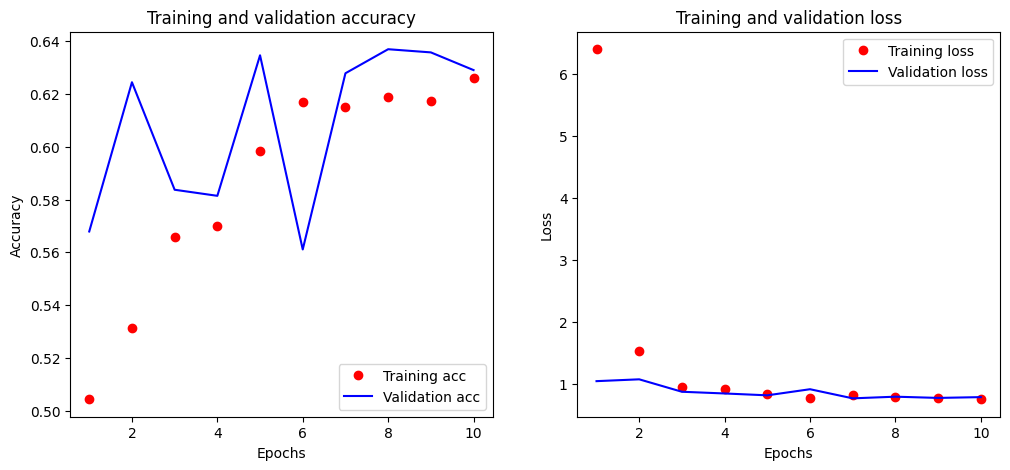

In [ ]:
# Define training and validation metrics for MLP2
acc = [0.5044, 0.5315, 0.5660, 0.5698, 0.5984, 0.6169, 0.6149, 0.6188, 0.6174, 0.6261]
val_acc = [0.5679, 0.6244, 0.5837, 0.5814, 0.6346, 0.5611, 0.6278, 0.6369, 0.6357, 0.6290]
loss = [6.4036, 1.5271, 0.9593, 0.9131, 0.8325, 0.7761, 0.8163, 0.7870, 0.7679, 0.7543]
val_loss = [1.0460, 1.0755, 0.8748, 0.8471, 0.8172, 0.9157, 0.7685, 0.7952, 0.7754, 0.7882]
epochs = range(1, 11)

# Plot the graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Accuracy plot
ax1.plot(epochs, acc, 'ro', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(epochs, loss, 'ro', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

**Convolutional Neural Networks**

In [13]:
# Define CNN1 with 2 convolutional layers with Padding, max pooling, and 2 dense layers
cnn1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define CNN2 with 2 convolutional layers without Padding, max pooling, and 2 dense layers
cnn2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define CNN3 with 3 convolutional layers, max pooling, and 2 dense layers
cnn3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define CNN4 with 3 convolutional layers, max pooling, GlobalAveragePooling for last convolutional layer and 1 dense layer
cnn4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')
])

# Define CNN5 with 1 convolutional layer, max pooling, Batch Normalization and 1 dense layer
cnn5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])

# Define CNN6 with 4 convolutional layers, max pooling, dropout, and 2 dense layers
cnn6 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn1.summary()
cnn2.summary()
cnn3.summary()
cnn4.summary()
cnn5.summary()
cnn6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [14]:
# Compile the models with categorical cross-entropy loss and adam optimizer

cnn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size  = 32
epochs      = 10

cnn1_history = cnn1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
cnn2_history = cnn2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
65/65 [==============================] - 5s 72ms/step - loss: 0.0502 - accuracy: 0.9884 - val_loss: 2.1382 - val_accuracy: 0.6505
Epoch 2/10
65/65 [==============================] - 3s 48ms/step - loss: 0.0394 - accuracy: 0.9908 - val_loss: 2.1748 - val_accuracy: 0.6403
Epoch 3/10
65/65 [==============================] - 3s 49ms/step - loss: 0.0352 - accuracy: 0.9913 - val_loss: 2.2481 - val_accuracy: 0.6606
Epoch 4/10
65/65 [==============================] - 3s 54ms/step - loss: 0.0453 - accuracy: 0.9903 - val_loss: 2.2349 - val_accuracy: 0.6663
Epoch 5/10
65/65 [==============================] - 3s 51ms/step - loss: 0.0634 - accuracy: 0.9845 - val_loss: 2.1813 - val_accuracy: 0.6414
Epoch 6/10
65/65 [==============================] - 3s 51ms/step - loss: 0.1567 - accuracy: 0.9719 - val_loss: 1.8281 - val_accuracy: 0.6606
Epoch 7/10
65/65 [==============================] - 3s 51ms/step - loss: 0.0961 - accuracy: 0.9816 - val_loss: 2.2781 - val_accuracy: 0.6380
Epoch 8/10
65

In [ ]:
batch_size  = 32
epochs      = 10

cnn3_history = cnn3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
cnn4_history = cnn4.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
65/65 [==============================] - 12s 100ms/step - loss: 48.6195 - accuracy: 0.5044 - val_loss: 0.8122 - val_accuracy: 0.5577
Epoch 2/10
65/65 [==============================] - 5s 72ms/step - loss: 0.8024 - accuracy: 0.5970 - val_loss: 0.8008 - val_accuracy: 0.6029
Epoch 3/10
65/65 [==============================] - 4s 62ms/step - loss: 0.6678 - accuracy: 0.6877 - val_loss: 0.7509 - val_accuracy: 0.6380
Epoch 4/10
65/65 [==============================] - 4s 56ms/step - loss: 0.5191 - accuracy: 0.7604 - val_loss: 0.7952 - val_accuracy: 0.6414
Epoch 5/10
65/65 [==============================] - 4s 60ms/step - loss: 0.3971 - accuracy: 0.8312 - val_loss: 0.9010 - val_accuracy: 0.6584
Epoch 6/10
65/65 [==============================] - 4s 56ms/step - loss: 0.2874 - accuracy: 0.8860 - val_loss: 1.1609 - val_accuracy: 0.6550
Epoch 7/10
65/65 [==============================] - 4s 59ms/step - loss: 0.2112 - accuracy: 0.9180 - val_loss: 1.3658 - val_accuracy: 0.6561
Epoch 8/10

In [ ]:
batch_size  = 32
epochs      = 10

cnn5_history = cnn5.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
cnn6_history = cnn6.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
65/65 [==============================] - 9s 74ms/step - loss: 1.4819 - accuracy: 0.5548 - val_loss: 1.7414 - val_accuracy: 0.5068
Epoch 2/10
65/65 [==============================] - 3s 50ms/step - loss: 0.5829 - accuracy: 0.7852 - val_loss: 0.9152 - val_accuracy: 0.6459
Epoch 3/10
65/65 [==============================] - 3s 54ms/step - loss: 0.3316 - accuracy: 0.8919 - val_loss: 0.8485 - val_accuracy: 0.6324
Epoch 4/10
65/65 [==============================] - 3s 53ms/step - loss: 0.1956 - accuracy: 0.9457 - val_loss: 0.8733 - val_accuracy: 0.6606
Epoch 5/10
65/65 [==============================] - 3s 54ms/step - loss: 0.1238 - accuracy: 0.9661 - val_loss: 0.8185 - val_accuracy: 0.7036
Epoch 6/10
65/65 [==============================] - 3s 50ms/step - loss: 0.0960 - accuracy: 0.9777 - val_loss: 0.9448 - val_accuracy: 0.6652
Epoch 7/10
65/65 [==============================] - 4s 54ms/step - loss: 0.0704 - accuracy: 0.9816 - val_loss: 2.1252 - val_accuracy: 0.5826
Epoch 8/10
65

In [ ]:
# Train history
histories = [cnn1_history, cnn2_history]

# Model names
model_names = ['CNN1', 'CNN2']

# Create a dataframe for the train and validation history
results = pd.DataFrame(columns=['Model', 'Train Acc.', 'Test Acc.', 'Train Loss', 'Test Loss'])

# Populate the results dataframe
for i, model_name in enumerate(model_names):
    train_acc = histories[i].history['accuracy'][-1]
    test_acc = histories[i].history['val_accuracy'][-1]
    train_loss = histories[i].history['loss'][-1]
    test_loss = histories[i].history['val_loss'][-1]
    results.loc[i] = [model_name, train_acc, test_acc, train_loss, test_loss]

print(results)

  Model  Train Acc.  Test Acc.  Train Loss  Test Loss
0  CNN1    0.986906   0.649321    0.082941   1.757216
1  CNN2    0.980601   0.635747    0.076200   2.171284


In [ ]:
# Train history
histories = [cnn3_history, cnn4_history]

# Model names
model_names = ['CNN3', 'CNN4']

# Create a dataframe for the train and validation history
results = pd.DataFrame(columns=['Model', 'Train Acc.', 'Test Acc.', 'Train Loss', 'Test Loss'])

# Populate the results dataframe
for i, model_name in enumerate(model_names):
    train_acc = histories[i].history['accuracy'][-1]
    test_acc = histories[i].history['val_accuracy'][-1]
    train_loss = histories[i].history['loss'][-1]
    test_loss = histories[i].history['val_loss'][-1]
    results.loc[i] = [model_name, train_acc, test_acc, train_loss, test_loss]

print(results)

  Model  Train Acc.  Test Acc.  Train Loss  Test Loss
0  CNN3    0.982541   0.661765    0.070057   2.208540
1  CNN4    0.553346   0.565611    0.814723   0.794872


In [ ]:
# Train history
histories = [cnn5_history, cnn6_history]

# Model names
model_names = ['CNN5', 'CNN6']

# Create a dataframe for the train and validation history
results = pd.DataFrame(columns=['Model', 'Train Acc.', 'Test Acc.', 'Train Loss', 'Test Loss'])

# Populate the results dataframe
for i, model_name in enumerate(model_names):
    train_acc = histories[i].history['accuracy'][-1]
    test_acc = histories[i].history['val_accuracy'][-1]
    train_loss = histories[i].history['loss'][-1]
    test_loss = histories[i].history['val_loss'][-1]
    results.loc[i] = [model_name, train_acc, test_acc, train_loss, test_loss]

print(results)

  Model  Train Acc.  Test Acc.  Train Loss  Test Loss
0  CNN5    0.990786   0.695701    0.042618   1.084589
1  CNN6    0.537827   0.556561    0.835174   0.810910


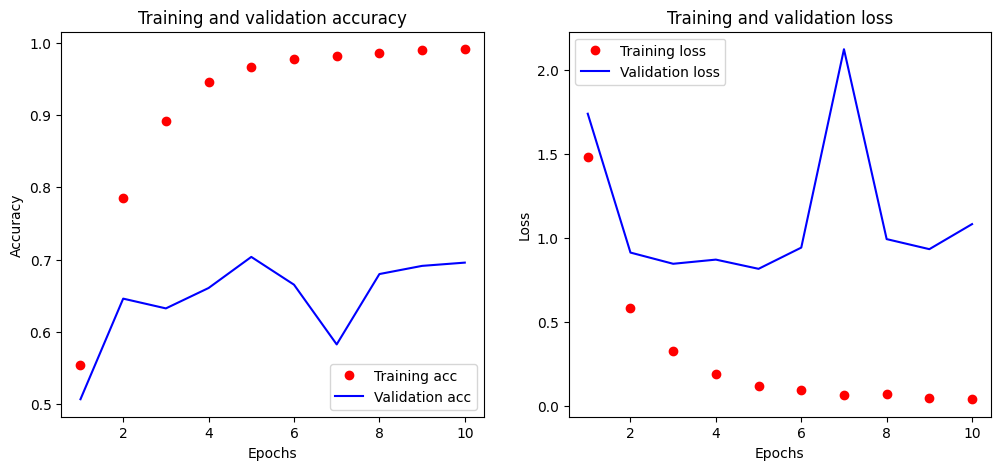

In [ ]:
# Define training and validation metrics for CNN5
acc = [0.5548, 0.7852, 0.8919, 0.9457, 0.9661, 0.9777, 0.9816, 0.9850, 0.9893, 0.9908]
val_acc = [0.5068, 0.6459, 0.6324, 0.6606, 0.7036, 0.6652, 0.5826, 0.6799, 0.6912, 0.6957]
loss = [1.4819, 0.5829, 0.3316, 0.1956, 0.1238, 0.0960, 0.0704, 0.0761, 0.0523, 0.0426]
val_loss = [1.7414, 0.9152, 0.8485, 0.8733, 0.8185, 0.9448, 2.1252, 0.9953, 0.9355, 1.0846]
epochs = range(1, 11)

# Plot the graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Accuracy plot
ax1.plot(epochs, acc, 'ro', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(epochs, loss, 'ro', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

DATA AUGMENTATION

With Adam Optimizer

In [ ]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Compile the cnn5 model
cnn5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history = cnn5.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

score = cnn5.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Epoch 1/10
64/64 [==============================] - 30s 389ms/step - loss: 1.4332 - accuracy: 0.4847 - val_loss: 1.1678 - val_accuracy: 0.5633
Epoch 2/10
64/64 [==============================] - 23s 366ms/step - loss: 0.9125 - accuracy: 0.5773 - val_loss: 1.1018 - val_accuracy: 0.5328
Epoch 3/10
64/64 [==============================] - 23s 365ms/step - loss: 0.8255 - accuracy: 0.6202 - val_loss: 1.2247 - val_accuracy: 0.4966
Epoch 4/10
64/64 [==============================] - 22s 346ms/step - loss: 0.7782 - accuracy: 0.6325 - val_loss: 0.8764 - val_accuracy: 0.6052
Epoch 5/10
64/64 [==============================] - 23s 356ms/step - loss: 0.7722 - accuracy: 0.6207 - val_loss: 1.1947 - val_accuracy: 0.5577
Epoch 6/10
64/64 [==============================] - 23s 364ms/step - loss: 0.7725 - accuracy: 0.6365 - val_loss: 0.8495 - val_accuracy: 0.5645
Epoch 7/10
64/64 [==============================] - 23s 362ms/step - loss: 0.7502 - accuracy: 0.6271 - val_loss: 0.7599 - val_accuracy: 0.6222

With RMSProp

In [ ]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, monitor='val_loss')

# Compile the cnn5 model
cnn5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history = cnn5.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

score = cnn5.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Epoch 1/10
64/64 [==============================] - 26s 376ms/step - loss: 0.7238 - accuracy: 0.6458 - val_loss: 0.8424 - val_accuracy: 0.6052
Epoch 2/10
64/64 [==============================] - 22s 346ms/step - loss: 0.7233 - accuracy: 0.6567 - val_loss: 0.9166 - val_accuracy: 0.5735
Epoch 3/10
64/64 [==============================] - 24s 366ms/step - loss: 0.7064 - accuracy: 0.6729 - val_loss: 0.7970 - val_accuracy: 0.6459
Epoch 4/10
64/64 [==============================] - 23s 361ms/step - loss: 0.7186 - accuracy: 0.6502 - val_loss: 0.7749 - val_accuracy: 0.6437
Epoch 5/10
64/64 [==============================] - 23s 357ms/step - loss: 0.7030 - accuracy: 0.6645 - val_loss: 0.9507 - val_accuracy: 0.5679
Epoch 6/10
64/64 [==============================] - 22s 348ms/step - loss: 0.6955 - accuracy: 0.6704 - val_loss: 0.7645 - val_accuracy: 0.6527
Epoch 7/10
64/64 [==============================] - 23s 351ms/step - loss: 0.6898 - accuracy: 0.6660 - val_loss: 0.8240 - val_accuracy: 0.6154

SGD Optimizer

In [ ]:
#Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Compile the model with SGD optimizer
cnn5.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history = cnn5.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

score = cnn5.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Epoch 1/10
64/64 [==============================] - 26s 388ms/step - loss: 0.8226 - accuracy: 0.5719 - val_loss: 2.0835 - val_accuracy: 0.4186
Epoch 2/10
64/64 [==============================] - 23s 365ms/step - loss: 0.8144 - accuracy: 0.5729 - val_loss: 2.4345 - val_accuracy: 0.4140
Epoch 3/10
64/64 [==============================] - 23s 357ms/step - loss: 0.7960 - accuracy: 0.5877 - val_loss: 1.2292 - val_accuracy: 0.5566
Epoch 4/10
64/64 [==============================] - 23s 353ms/step - loss: 0.7862 - accuracy: 0.6138 - val_loss: 5.2887 - val_accuracy: 0.4027
Epoch 5/10
64/64 [==============================] - 24s 369ms/step - loss: 0.7884 - accuracy: 0.5911 - val_loss: 1.0168 - val_accuracy: 0.4785
Epoch 6/10
64/64 [==============================] - 23s 365ms/step - loss: 0.7761 - accuracy: 0.5985 - val_loss: 0.8127 - val_accuracy: 0.5758
Epoch 7/10
64/64 [==============================] - 23s 357ms/step - loss: 0.7796 - accuracy: 0.5852 - val_loss: 0.8605 - val_accuracy: 0.5667

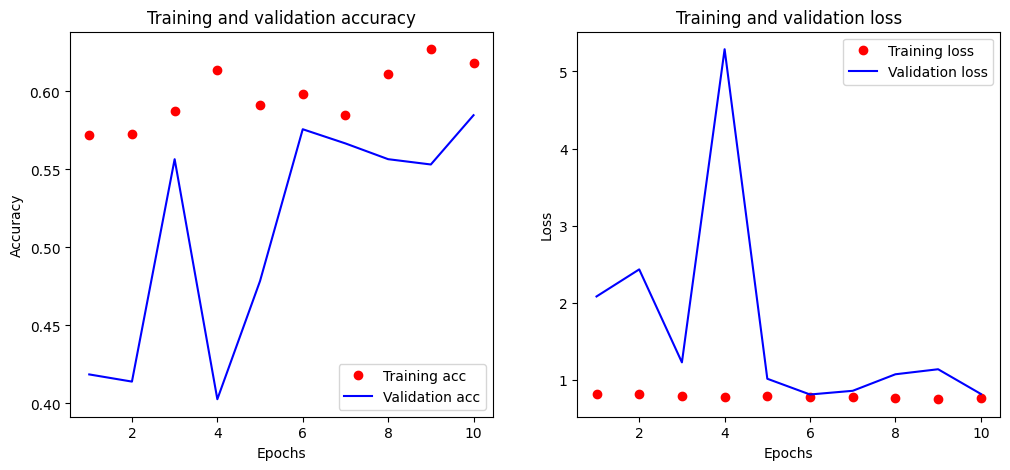

In [ ]:
# Define training and validation metrics for CNN5 with Data augmentation with SGD
acc = [0.5719, 0.5729, 0.5877, 0.6138, 0.5911, 0.5985, 0.5852, 0.6113, 0.6271, 0.6182]
val_acc = [0.4186, 0.4140, 0.5566, 0.4027, 0.4785, 0.5758, 0.5667, 0.5566, 0.5532, 0.5848]
loss = [0.8226, 0.8144, 0.7960, 0.7862, 0.7884, 0.7761, 0.7796, 0.7626, 0.7514, 0.7698]
val_loss = [2.0835, 2.4345, 1.2292, 5.2887, 1.0168, 0.8127, 0.8605, 1.0748, 1.1400, 0.8201]
epochs = range(1, 11)

# Plot the graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Accuracy plot
ax1.plot(epochs, acc, 'ro', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(epochs, loss, 'ro', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [31]:
# Deconvolution
def visualize_deconvolution(cnn5, image):
    analyzer = innvestigate.create_analyzer("deep_taylor", cnn5)
    analysis = analyzer.analyze(image)
    return analysis

In [21]:
# Activation Maximization
def visualize_activation_maximization(cnn5, layer_name, filter_index, input_shape=(224, 224, 3)):
    # Define a loss function that maximizes the activation of the specified filter
    loss = K.mean(cnn5.output[:, filter_index])

    # Compute the gradient of the input picture with respect to this loss
    with tf.GradientTape() as tape:
        layer_output = cnn5.get_layer(layer_name).output
        grads = tape.gradient(loss, layer_output)

    # Normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([cnn5.input], [loss, grads])

    # Start from a gray image with some noise
    input_img_data = np.random.random((1, input_shape[0], input_shape[1], input_shape[2])) * 20 + 128.0

    # Run gradient ascent for 20 steps
    step = 1.0
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    # Convert the image to a displayable format
    img = input_img_data[0]
    img = (img - img.min()) / (img.max() - img.min()) * 255
    img = img.astype('uint8')

    return img


In [17]:
# Choosing a sample image from the test set
sample_index = 0
sample_image = X_test[sample_index].reshape(1, 224, 224, 3)

In [19]:
sys.setrecursionlimit(10**6)

In [33]:
# Visualize Activation Maximization
'''
activation_maximization_img = visualize_activation_maximization(cnn5, 'conv2d_10', 0)
plt.imshow(activation_maximization_img)
plt.title('Activation Maximization')
plt.show()
'''

"\nactivation_maximization_img = visualize_activation_maximization(cnn5, 'conv2d_10', 0)\nplt.imshow(activation_maximization_img)\nplt.title('Activation Maximization')\nplt.show()\n"

The following error was faced:
AttributeError: 'KerasTensor' object has no attribute '_id'

In [34]:
# Visualize Deconvolution
'''
deconvolution_img = visualize_deconvolution(cnn5, sample_image)
plt.imshow(deconvolution_img)
plt.title('Deconvolution')
plt.show()
'''

"\ndeconvolution_img = visualize_deconvolution(cnn5, sample_image)\nplt.imshow(deconvolution_img)\nplt.title('Deconvolution')\nplt.show()\n"

The following error was faced: NotAnalyzeableModelException: This analysis method does not support softmax layers.
Check triggered by layers: [<keras.src.layers.core.dense.Dense object at 0x7a470c6dbd30>]

## **Transfer learning**

In [ ]:
# Load the ResNet50 model without the top layer
resnet = ResNet50(include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Freeze the weights of the ResNet50 model
for layer in resnet.layers:
    layer.trainable = False

# Add new classification layers
model = Sequential()
model.add(resnet)
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with data augmentation and early stopping
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
64/64 [==============================] - 411s 6s/step - loss: 0.8870 - accuracy: 0.5601 - val_loss: 0.7311 - val_accuracy: 0.6697
Epoch 2/10
64/64 [==============================] - 397s 6s/step - loss: 0.7904 - accuracy: 0.5877 - val_loss: 0.7729 - val_accuracy: 0.6075
Epoch 3/10
64/64 [==============================] - 348s 5s/step - loss: 0.7732 - accuracy: 0.6207 - val_loss: 0.7349 - val_accuracy: 0.6391
Epoch 4/10
64/64 [==============================] - 391s 6s/step - loss: 0.7568 - accuracy: 0.6197 - val_loss: 0.7677 - val_accuracy: 0.6380
Epoch 5/10
64/64 [==============================] - 389s 6s/step - loss: 0.7629 - accuracy: 0.6232 - val_loss: 0.7463 - val_accuracy: 0.6052
Epoch 6/10
64/64 [==============================] - 344s 5s/step - loss: 0.7532 - accuracy: 0.6281 - val_loss: 0.7443 - val_accuracy: 0.6222
Epoch 7/10
64/64 [==============================] - 344s 5s/step - loss: 0.7277 - accurac

In [ ]:
# Load MobileNetV2 model without top layer
base_model = MobileNetV2(include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Freeze the weights of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
model = Sequential([
    base_model,
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, lr_scheduler]
)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


9406464/9406464 [==============================] - 0s 0us/step


Epoch 1/30
64/64 [==============================] - 123s 2s/step - loss: 0.9005 - accuracy: 0.5103 - val_loss: 0.8183 - val_accuracy: 0.5079 - lr: 0.0010
Epoch 2/30
64/64 [==============================] - 127s 2s/step - loss: 0.8321 - accuracy: 0.5517 - val_loss: 0.8014 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 3/30
64/64 [==============================] - 126s 2s/step - loss: 0.8147 - accuracy: 0.5665 - val_loss: 0.8354 - val_accuracy: 0.5475 - lr: 0.0010
Epoch 4/30
64/64 [==============================] - 128s 2s/step - loss: 0.8038 - accuracy: 0.5990 - val_loss: 0.7733 - val_accuracy: 0.5814 - lr: 0.0010
Epoch 5/30
64/64 [==============================] - 114s 2s/step - loss: 0.7954 - accuracy: 0.5837 - val_loss: 0.7784 - val_accuracy: 0.5758 - lr: 0.0010
Epoch 6/30
64/64 [==============================] - 118s 2s/step - loss: 0.7975 - accuracy: 0.5887 - val_loss: 0.8132 - val_accuracy: 0.5747 - lr: 0.0010
Epoch 7/30
64/64 [==============================] - 116s 2s/step - loss: 0.7

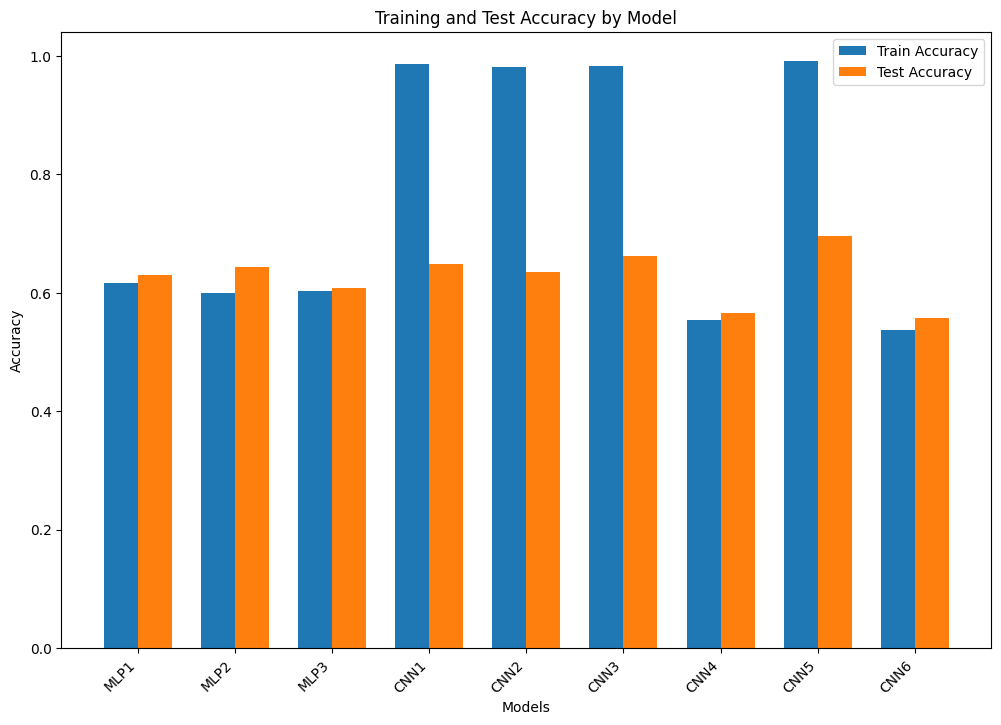

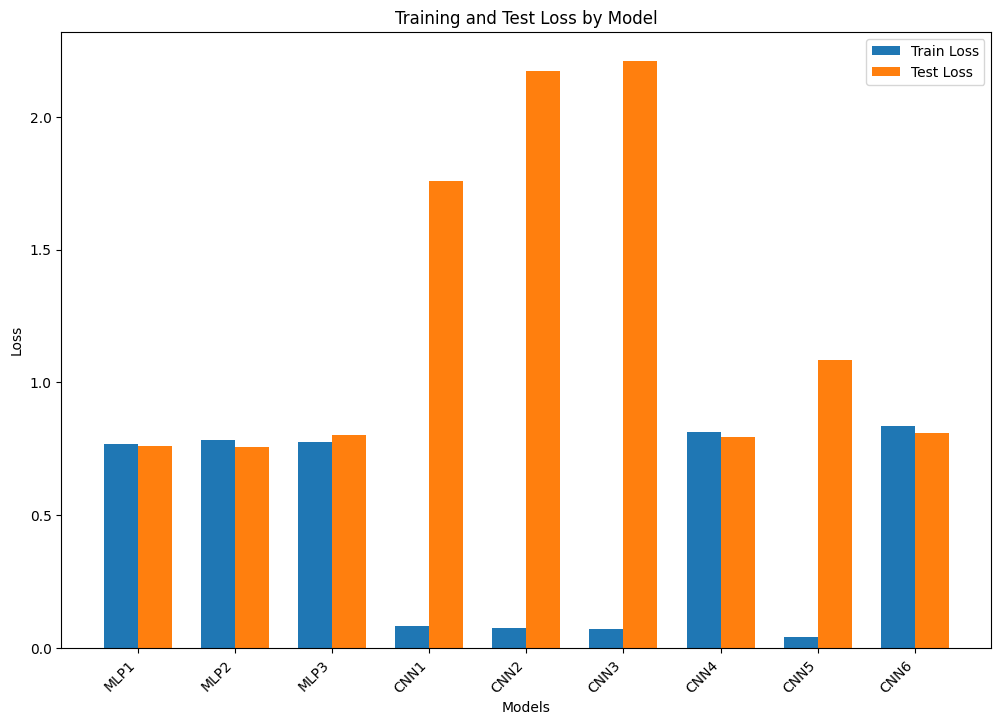

In [1]:
# Data
models = ['MLP1', 'MLP2', 'MLP3', 'CNN1', 'CNN2', 'CNN3', 'CNN4', 'CNN5', 'CNN6']
train_acc = [0.616392, 0.598933, 0.603298, 0.986906, 0.980601, 0.982541, 0.553346, 0.990786, 0.537827]
test_acc = [0.63009, 0.643665, 0.607466, 0.649321, 0.635747, 0.661765, 0.565611, 0.695701, 0.556561]
train_loss = [0.768041, 0.784713, 0.774615, 0.082941, 0.0762, 0.070057, 0.814723, 0.042618, 0.835174]
test_loss = [0.759842, 0.755824, 0.802383, 1.757216, 2.171284, 2.20854, 0.794872, 1.084589, 0.81091]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting accuracy
rects1 = ax.bar(x - width/2, train_acc, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Test Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Plotting loss
fig, ax = plt.subplots(figsize=(12, 8))
rects3 = ax.bar(x - width/2, train_loss, width, label='Train Loss')
rects4 = ax.bar(x + width/2, test_loss, width, label='Test Loss')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Loss')
ax.set_title('Training and Test Loss by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.show()